# Laptop Price Data Project

The aim of this study is to utilize mechine learning techniques to uncover and analyze the most relevant factors affecting the laptop price.

## Part 1: Load the Data

This study is using the Laptop Price Dataset available from Kaggle, (URL: https://www.kaggle.com/datasets/gyanprakashkushwaha/laptop-price-prediction-cleaned-dataset). 

In [1]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df = pd.read_csv('data/laptop_data.csv')
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


## Part 2: Check the Data Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


Based on the information of the dataset, there is no error found in data type.

## Part 3: Data Cleaning

We can drop the features that are unnecessary. `Company`, `TypeName`, `Cpu_brand`, `Gpu_brand` and `Os` are object and not a meaningful feature so we can remove it and replace the df.

In [4]:
df = df.drop(columns=['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand','Os'])

Reorder the columns so the `Price` (the target variable) is the first column.

In [5]:
df = df.iloc[:,[2,0,1,3,4,5,6,7]]

In [6]:
df.head()

,Price,Ram,Weight,TouchScreen,Ips,Ppi,HDD,SSD
0,11.175755,8,1.37,0,1,226.983005,0,128
1,10.776777,8,1.34,0,0,127.677940,0,0
2,10.329931,8,1.86,0,0,141.211998,0,256
3,11.814476,16,1.83,0,1,220.534624,0,512
4,11.473101,8,1.37,0,1,226.983005,0,256


## Part 4: Correlation Matrix

In [7]:
df.corr()

,Price,Ram,Weight,TouchScreen,Ips,Ppi,HDD,SSD
Price,1.000000,0.680519,0.151386,0.194289,0.279240,0.480687,-0.097361,0.658808
Ram,0.680519,1.000000,0.389134,0.113316,0.202809,0.294927,0.097340,0.599552
Weight,0.151386,0.389134,1.000000,-0.292288,0.023966,-0.319499,0.510876,-0.056985
TouchScreen,0.194289,0.113316,-0.292288,1.000000,0.136973,0.452107,-0.205105,0.252142
Ips,0.279240,0.202809,0.023966,0.136973,1.000000,0.288833,-0.090411,0.215197
Ppi,0.480687,0.294927,-0.319499,0.452107,0.288833,1.000000,-0.290774,0.499899
HDD,-0.097361,0.097340,0.510876,-0.205105,-0.090411,-0.290774,1.000000,-0.400625
SSD,0.658808,0.599552,-0.056985,0.252142,0.215197,0.499899,-0.400625,1.000000


## Part 5: Display the Correlation Matrix as Heat Map

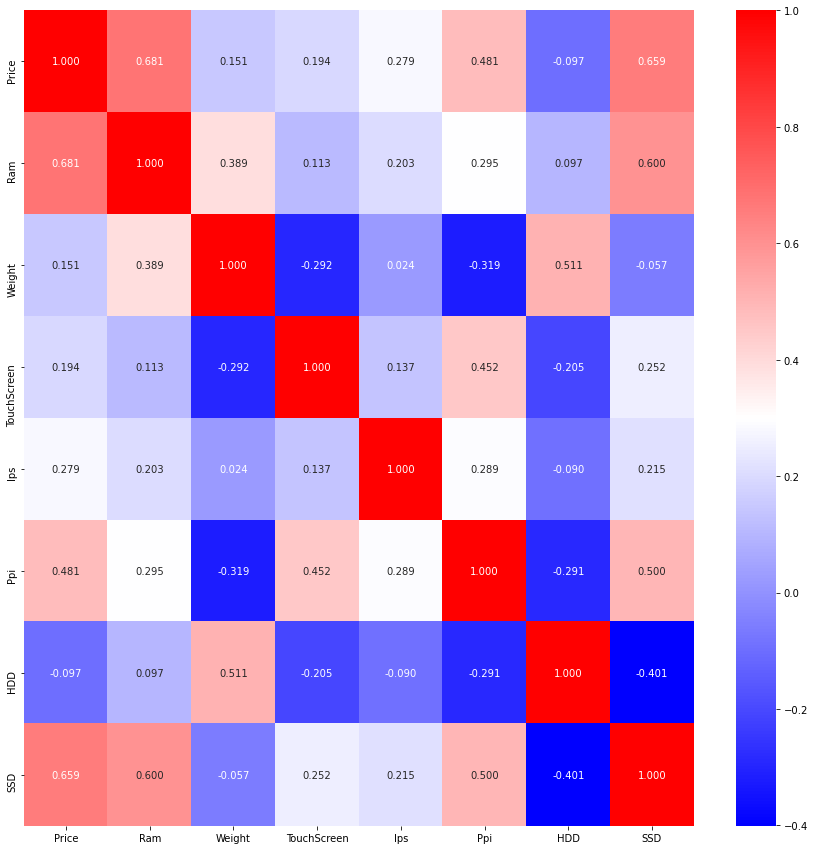

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
hm = sns.heatmap(df.corr(), fmt='.3f', cmap='bwr', annot=True, ax=ax, xticklabels='auto', yticklabels='auto')

## Part 5: Display the Correlation Matrix as Pair Plot

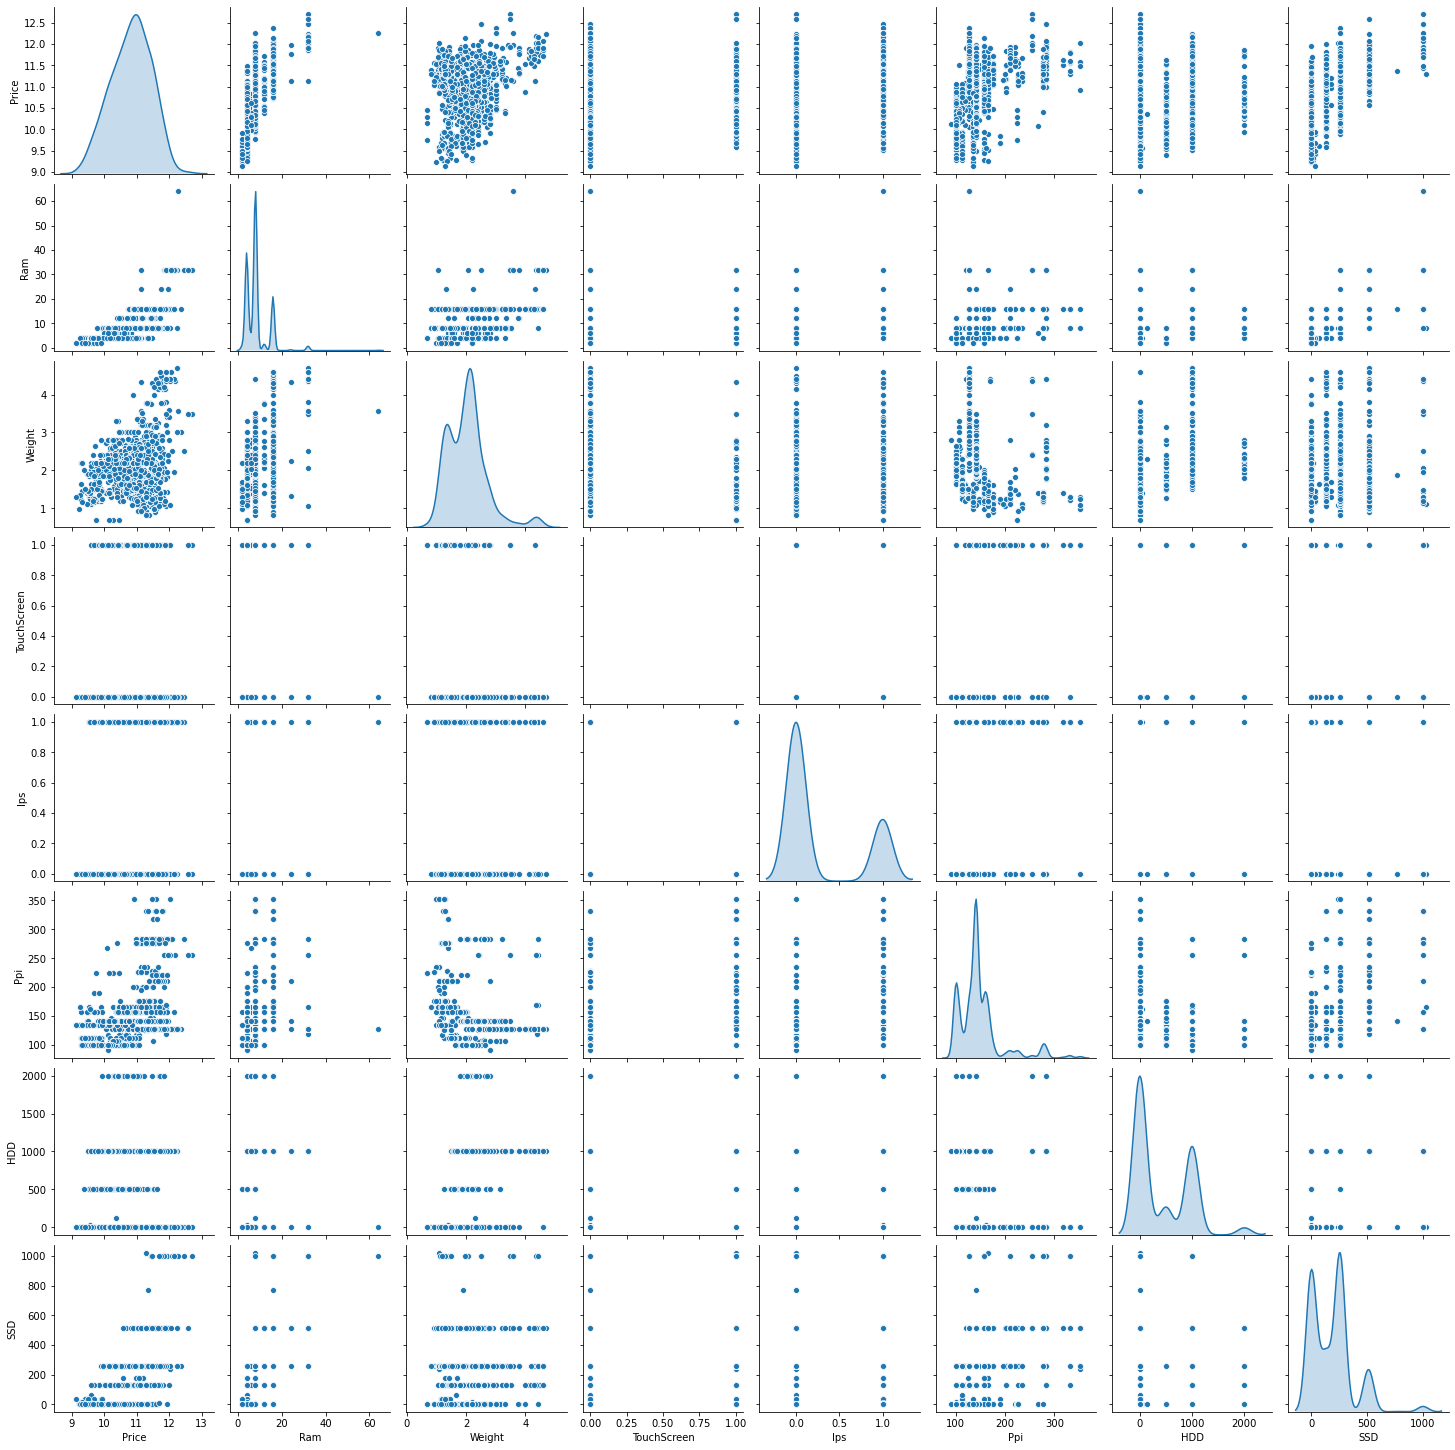

In [9]:
selected_columns = df.columns[:10]
df_selected = df[selected_columns]
sns.pairplot(df_selected, diag_kind='kde')
plt.show()

Based on the heat map and pair plot, the best guess predictor is `Ram`, followed by `SSD` and `Ppi`.

## Part 6: Simple linear regression

Firstly let's split the data to X_train and X_test.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2)
print("Length of X_train:", len(X_train))
print("Length of X_test:", len(X_test))

Length of X_train: 1018
Length of X_test: 255


In [11]:
model = smf.ols(formula='Price ~ Ram', data=X_train).fit()

print(model.summary())

adj_R2 = model.rsquared_adj
print("Adjusted R-squared value:", adj_R2)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     862.3
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          9.99e-138
Time:                        12:11:51   Log-Likelihood:                -649.15
No. Observations:                1018   AIC:                             1302.
Df Residuals:                    1016   BIC:                             1312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1270      0.028    366.849      0.0

Then we create a Simple Linear Regression with formula `Price ~ SSD`.

In [12]:
model = smf.ols(formula='Price ~ SSD', data=X_train).fit()

print(model.summary())

adj_R2 = model.rsquared_adj
print("Adjusted R-squared value:", adj_R2)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     777.2
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.72e-127
Time:                        12:11:51   Log-Likelihood:                -672.74
No. Observations:                1018   AIC:                             1349.
Df Residuals:                    1016   BIC:                             1359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4167      0.021    505.483      0.0

Then we create a Simple Linear Regression with formula `Price ~ Ppi`.

In [13]:
model = smf.ols(formula='Price ~ Ppi', data=X_train).fit()

print(model.summary())

adj_R2 = model.rsquared_adj
print("Adjusted R-squared value:", adj_R2)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     288.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           4.03e-57
Time:                        12:11:51   Log-Likelihood:                -834.75
No. Observations:                1018   AIC:                             1674.
Df Residuals:                    1016   BIC:                             1683.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8130      0.062    159.008      0.0

We can see that when we build the Simple Linear Regression Model with those 3 features that has highest corrlation with Price, the R-squared value was not large. 

`Price ~ Ram` has highest R-squared value of 0.483.

`Price ~ SSD` has highest R-squared value of 0.437.

`Price ~ Ppi` has highest R-squared value of 0.215.

Therefore we can build a Multi-Linear Regression Model to see if it can improve the accuracy.

## Part 7: Multi-Linear Regression Model

In [14]:
# Initialize variables to store the best R² value and corresponding feature
best_r_squared = -1  # Start with the lowest possible value
best_predictor = ''

# Instantiate the regression model
model = LinearRegression()

# Loop through each column (except 'Price' as it's the target)
for column in df.columns:
    if column != 'Price' and df[column].dtype in ['float64', 'int64']:  # Ensure the column is numeric
        X = df[[column]]  # Feature matrix
        y = df['Price']  # Target variable

        # Fit the model
        model.fit(X, y)

        # Predict the mpg
        y_pred = model.predict(X)

        # Calculate R² value
        r_squared = r2_score(y, y_pred)

        # Check if this R² is the best we've seen so far
        if r_squared > best_r_squared:
            best_r_squared = r_squared
            best_predictor = column

# Print the best predictor and its R² value
print(f'Best Predictor: {best_predictor}')
print(f'Best R² Value: {best_r_squared}')

Best Predictor: Ram
Best R² Value: 0.46310600112573364


In [15]:
best_degree = 0
best_r_squared = 0

for degree in range(1, 21):  
    X = np.column_stack([np.power(df[best_predictor], i) for i in range(1, degree + 1)])
    y = df['Price']

    # Add a constant to the model (intercept)
    X = sm.add_constant(X)

    # Fit the model
    model = sm.OLS(y, X).fit()

    # Get the R² value
    r_squared = model.rsquared

    # Check if this R² is the best we've seen so far
    if r_squared > best_r_squared:
        best_r_squared = r_squared
        best_degree = degree

# Print the best degree and its R² value
print(f'Best Degree: {best_degree}')
print(f'Best R² Value: {best_r_squared}')
  

Best Degree: 8
Best R² Value: 0.6098242522793986


In [16]:
model = smf.ols('Price ~ Ram + Weight + TouchScreen + Ips + Ppi + HDD + SSD', data=df).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     274.8
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          9.67e-249
Time:                        12:11:56   Log-Likelihood:                -607.93
No. Observations:                1273   AIC:                             1232.
Df Residuals:                    1265   BIC:                             1273.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.5797      0.067    143.904      

From the summary we can see the some features have a p>0.05 so we can remove it from the formula.

In [17]:
model = smf.ols('Price ~ Ram + Weight + Ips + Ppi + SSD', data=df).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     384.5
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          5.80e-251
Time:                        12:11:57   Log-Likelihood:                -608.78
No. Observations:                1273   AIC:                             1230.
Df Residuals:                    1267   BIC:                             1260.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5757      0.066    144.627      0.0

Although the R-squared did not increase after applying the new formula, the less features included results a more simple model and avoid overfitting.

#### Leverage vs. the Square of the Residual

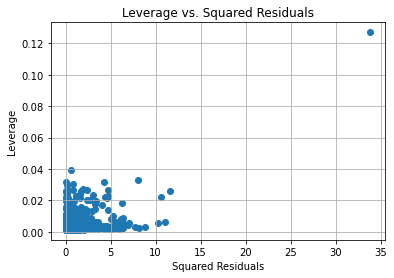

In [18]:
formula = 'Price ~ Ram + Weight + Ips + Ppi + SSD'
model = smf.ols(formula, data=df).fit()

# Calculate influences and residuals
influence = model.get_influence()
resid_squared = influence.resid_studentized_external ** 2
leverage = influence.hat_matrix_diag

# Plot leverage vs. squared residuals
plt.scatter(resid_squared, leverage)
plt.ylabel('Leverage')
plt.xlabel('Squared Residuals')
plt.title('Leverage vs. Squared Residuals')
plt.grid(True)
plt.show()

# Conclusion

In this project, I aimed to identify the key factors influencing laptop prices using machine learning techniques. The process involved multiple steps, including data loading, cleaning, exploratory data analysis, and building linear regression model.

## Key Findings

### Data Preparation and Cleaning

We started by loading the dataset from Kaggle, ensuring data types were appropriate, and removing non-numeric and less relevant features. This step was crucial to prepare the data for analysis and modeling.

### Correlation Analysis

Through the correlation matrix and visualizations like heat maps and pair plots, we can identified that RAM, SSD, and PPI had the highest correlations with the laptop prices. This guided us in selecting these features for further analysis.

### Simple Linear Regression

We performed simple linear regression for each of the highly correlated features (RAM, SSD, and PPI). The RAM feature showed the highest adjusted R-squared value of 0.486, indicating a moderate level of predictive power.

### Multi-Linear Regression Model

To improve the predictive accuracy, we built a multi-linear regression model using multiple features. The model initially included RAM, Weight, TouchScreen, Ips, Ppi, HDD, and SSD. We refined the model by removing features with high p-values (>0.05), leading to a final model with RAM, Weight, Ips, Ppi, and SSD. This simplified model reduced the risk of overfitting while maintaining a balance between complexity and predictive power.

## Implications

The analysis highlighted that certain hardware specifications, particularly RAM and SSD, significantly impact laptop prices. These findings can assist manufacturers and consumers in understanding price determinants and making informed decisions. However, the predictive power of our models, while reasonable, suggests that other factors not included in the dataset might also play significant roles in determining laptop prices.

### Future work could involve:

Expanding the dataset to include more features, such as brand reputation, build quality, and market trends.
Utilizing advanced machine learning techniques like ensemble methods to enhance predictive accuracy.
Conducting time-series analysis to understand how the impact of different features on price evolves over time.

# GitHub Link

Here is the link of the GitHub Repository: https://github.com/chloefung/DTSA5509-Final-Project/